## Tarea 5. Inteligencia Artificial: Optimización Multiobjetivo

### Moisés Salguero Morales - 2017238398
### Andrés Jiménez Mora - 2017106748

Primeramente se debe conocer el diseño interno de un multiplexor 8 a 1 a partir de compuertas OR, AND y NOT, el cual es el que se muestra a continuación. Cabe resaltar que existen muchas combinaciones de compuertas que se pueden realizar para obtener un multiplexor, esta combinación es la más típica y es solo a modo de ejemplo. Sin embargo se buscará una configuración que no sea precisamente esta. 
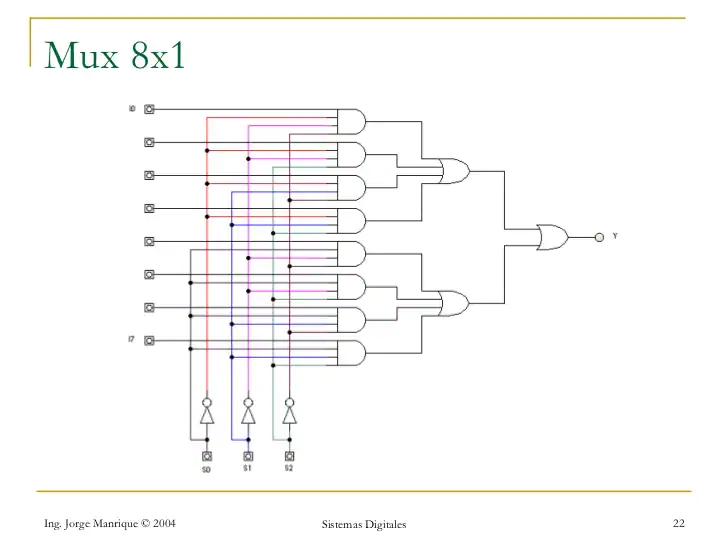
 

Los tiempos de establecimiento que usarán serán la suma de los tiempos de las compuertas NOT, AND y OR. 

- Compuertas NOT: se utilizó la compuerta NOT SN54/74LS04 de motorola, la cual posee un delay máximo de 15ns.

- Compuertas AND 2 entradas: DM74LS08, de la marca FAIRCH tiempo máximo transición, 18ns.(IC 8 inputs ) 

- Compuerta AND 4 entradas: 74HC21 de la marca NEXPERIA, tiempo de transición máximo 165ns. (IC 8 inputs) 

- Compuerta Or 2 entradas: CD4072B de texas instruments, su tiempo máximo de transición es de 90ns. (IC 8 iputs) 

- Compuertas OR 4 entradas: CD4072B de texas instruments, su tiempo de transición máximo es de 120ns. (IC 8 inputs)

- Compuertas or 8 entradas: M74HC4078 de STMicroelectronics, su tiempo de transición es de 500ns. (IC 8 inputs)

### Importación de librerías 

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm 
import numpy as np
import pymoo
from pymoo.optimize import minimize 
import autograd.numpy as anp
from pymoo.model.problem import Problem

### Definición de problemas 

Para este caso se tiene 3 funciones objetivo, la primera indica coste del circuito total; la segunda el tiempo del recorrido más largo y la última que se encarga del consumo energético para el caso específico. Cada una de las funciones calcula el número de compuertas ands2 y ors2 con base en el resto de ellas, de esta forma se reducen parámetros de la función objetivo.

In [11]:
#Función para costes
def costes(array): 
    [ands4, ors4, ors8] = array
    
    ands4 = int(ands4)
    ors4 = int(ands4)
    ors8 = int(ands4)
    
    ands2 = (8-ands4)*3
    ors2=0
    if (ors8==0):
        if (ors4==1): 
            ors2=4
        elif(ors4==2):
            ors2=1
        elif (ors4==0):
            ors2==7
    else:
        ors2=0
        ors4=0
        
    costes = ands2*6.25/4 + ands4*26.25/2 + ors2*6.25/4 + ors4*6.25/2 + ors8*6.25
    return costes 

#Función para tiempo del recorrido más largo
def tiempo(array): 
    [ands4, ors4, ors8]= array
    
    ands4 = int(ands4)
    ors4 = int(ands4)
    ors8 = int(ands4)
    
    tiempo_ands=0
    tiempo_ors=0  
    ands2 = (8-ands4)*3
    ors2=0
    
    if (ors8==1):
        tiempo_ors= 500
        if(int(ands2/3)==ands2/3):
            tiempo_ands=20000
        elif(ands4==8): 
            tiempo_ands= 165
        elif(ands2>0):
            tiempo_ands=18*2
            
    elif (ors4==2 or ors4==1):
        tiempo_ors = 90 +120
        if(int(ands2/3)==ands2/3):
            tiempo_ands=200000
        if(ands4==8): 
            tiempo_ands= 165
        elif(ands2>0):
            tiempo_ands=18*2
            
    elif (ors4==0): 
        tiempo_ors = 3*90
        if(int(ands2/3)==ands2/3):
            tiempo_ands=20000
        if(ands4==8): 
            tiempo_ands= 165
        elif(ands2>0):
            tiempo_ands=18*2
    else: 
        tiempo_ands = 1000000
        tiempo_ors  = 1000000
    
    tiempo_total=tiempo_ands+tiempo_ors
    return tiempo_total

#Función para el consumo energético
def energia(array):
    [ands4, ors4, ors8] = array
    
    ands4 = int(ands4)
    ors4 = int(ands4)
    ors8 = int(ands4)
    
    ands2 = (8-ands4)*3
    ors2=0
    if (ors8==0):
        if (ors4==1): 
            ors2=4
        elif(ors4==2):
            ors2=1
        elif (ors4==0):
            ors2==7
    else:
        ors2=0
        ors4=0
    energia = ands2 + ands4*2.5 + ors2 + ors4*2.5 + ors8*6.25 
    return energia


In [12]:
#Se cargan las funciones objetivo en el problemWrapper
class ProblemWrapper(Problem):
  def _evaluate(self,designs,out,*args, **kwargs):
    result= []
    result2 = []
    result3 = []
    
    for design in designs:
        result.append(costes(design))
        result2.append(tiempo(design))
        result3.append(energia(design))
    out['F'] = anp.column_stack([result , result2, result3])

In [13]:
problem = ProblemWrapper(n_var = 3, n_obj = 3, xl = [0, 0, 0], xu = [9, 3, 2], type_var= ['int', 'int', 'int'])

### Definición del algoritmo 

In [14]:
#Mediante la librería pymoo se utiliza el algoritmo NSGA2 para realizar la optimización multiobjetivo
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_algorithm, get_crossover, get_mutation, get_sampling

#Se definen los parámetros
algorithm = get_algorithm("nsga2",
              pop_size=200,
              sampling=get_sampling("int_random"),
              crossover=get_crossover("int_sbx", prob=1.0, eta=3.0),
              mutation=get_mutation("int_pm", eta=3.0),
              eliminate_duplicates=False,
              
              )

#algorithm = NSGA2()
#Número de generaciones
stop_criteria = ('n_gen', 200)

In [7]:
#Se ejecuta la optimización
results = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=stop_criteria,
    verbose = True
)

n_gen |  n_eval |  n_nds  |     eps      |  indicator  
    1 |     200 |      38 |            - |            -
    2 |     400 |     104 |  0.00000E+00 |            f
    3 |     600 |     200 |  0.00000E+00 |            f
    4 |     800 |     200 |  0.00000E+00 |            f
    5 |    1000 |     200 |  0.00000E+00 |            f
    6 |    1200 |     200 |  0.00000E+00 |            f
    7 |    1400 |     200 |  0.00000E+00 |            f
    8 |    1600 |     200 |  0.00000E+00 |            f
    9 |    1800 |     200 |  0.00000E+00 |            f
   10 |    2000 |     200 |  0.00000E+00 |            f
   11 |    2200 |     200 |  0.00000E+00 |            f
   12 |    2400 |     200 |  0.00000E+00 |            f
   13 |    2600 |     200 |  0.00000E+00 |            f
   14 |    2800 |     200 |  0.00000E+00 |            f
   15 |    3000 |     200 |  0.00000E+00 |            f
   16 |    3200 |     200 |  0.00000E+00 |            f
   17 |    3400 |     200 |  0.00000E+00 |      

In [8]:
res_data = results.F.T
print(res_data[0])
print(res_data[1])
print(res_data[2])

[37.5   66.875 37.5   37.5   37.5   66.875 37.5   37.5   37.5   37.5
 37.5   37.5   37.5   37.5   37.5   37.5   37.5   37.5   37.5   37.5
 37.5   66.875 37.5   37.5   37.5   37.5   66.875 37.5   37.5   37.5
 37.5   37.5   66.875 37.5   66.875 37.5   37.5   37.5   37.5   66.875
 37.5   37.5   37.5   37.5   37.5   37.5   66.875 37.5   66.875 66.875
 37.5   37.5   37.5   37.5   37.5   37.5   37.5   66.875 37.5   66.875
 37.5   37.5   37.5   37.5   37.5   66.875 37.5   37.5   66.875 37.5
 37.5   37.5   37.5   37.5   37.5   37.5   66.875 37.5   37.5   37.5
 37.5   37.5   66.875 37.5   37.5   37.5   66.875 37.5   37.5   66.875
 37.5   37.5   37.5   37.5   37.5   66.875 37.5   66.875 37.5   37.5
 37.5   37.5   37.5   37.5   37.5   66.875 37.5   66.875 66.875 37.5
 66.875 37.5   37.5   66.875 37.5   37.5   37.5   37.5   37.5   37.5
 37.5   66.875 66.875 37.5   37.5   37.5   37.5   37.5   66.875 37.5
 37.5   37.5   66.875 37.5   37.5   37.5   37.5   66.875 66.875 37.5
 37.5   37.5   37.5   37.5

In [16]:
#Printeo del frente de Paleto para este problema
import plotly.graph_objects as go
import numpy as np

# Helix equation
x= res_data[0]
y=res_data[1]
z=res_data[2]

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')])
fig.update_layout(scene = dict(
   xaxis_title = 'Costes',
   yaxis_title = 'Tiempo',
   zaxis_title = 'Energía'))
### Análisis de resultadosfig.show()

### Análisis de resultados

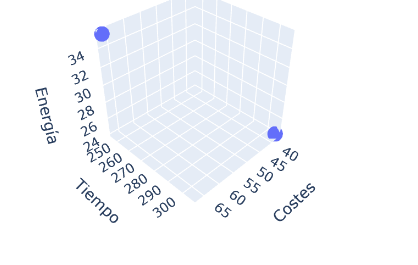

Para este problema en particular se obutvo un frente de Paleto con pocos puntos, la gran mayoría están muy concrentados en regiones específicas del espacio tridimensional. Se obtuvo una optimización medianamente eficaz debido a las dificultades presentadas para plantear las funciones objetivo. Debido a las pocas opciones que se tiene por las limitaciones de diseño de un multiplexor 8 a 1 y además, de ser un problema de variables discretas, el número opciones óptimas para este problema disminuyen considerablente. Las opciones que se obtuvieron como óptimas fueron: la primera con un coste de 37.5, un tiempo de establecimineto de 306 nanosegundos y un gasto de energía de 24; la segunda opción fue con un coste de 66.88, un tiempo de establecimiento de 246ns y un gasto energético de 35.5.